In [7]:
import numpy as np
import pandas as pd
from functools import reduce

In [59]:
senet = pd.read_csv('senet50_100epochs.csv').rename(columns = {'is_related':'is_related_senet'})
resnet = pd.read_csv('resnet50_1.csv').rename(columns = {'is_related':'is_related_resnet'})
resnet_2 = pd.read_csv('resnet50-2.csv').rename(columns = {'is_related':'is_related_resnet_2'})
facenet = pd.read_csv('facenet_submission.csv').rename(columns = {'is_related':'is_related_facenet'})
inceptionrn = pd.read_csv('inceptionresnetv2-imagenet.csv').rename(columns = {'is_related':'is_related_inceptionrn'})

# scores dict for weighted voting
scores = {'senet': 0.855, 'resnet': 0.866, 'resnet_2': 0.797, 'facenet': 0.772, 'inceptionrn': 0.689}
print(sum(scores.values()))

3.979


### Simple Average

In [26]:
sim_avg = [senet, resnet, resnet_2, facenet, inceptionrn]
sim_avg = reduce(lambda left,right: pd.merge(left,right,on=['img_pair'], how='inner'), sim_avg)

/var/folders/xn/qxjmq8hj3ps62r2dfnf5s0nm0000gn/T/ipykernel_45648/3593094555.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_related_x'} in the result is deprecated and will raise a MergeError in a future version.
  sim_avg = reduce(lambda left,right: pd.merge(left,right,on=['img_pair'], how='inner'), sim_avg)


In [27]:
sim_avg.columns = ['img_pair', 'is_related_1', 'is_related_2', 'is_related_3', 'is_related_4', 'is_related_5']
sim_avg['is_related'] = sim_avg.apply(lambda row: (row['is_related_1'] + row['is_related_2'] + row['is_related_3'] +
                                                  row['is_related_4'] + row['is_related_5']) / 5 , axis=1)

In [30]:
# sim_avg = sim_avg.drop(['is_related_1', 'is_related_2', 'is_related_3', 'is_related_4', 'is_related_5'], axis=1)
sim_avg.set_index('img_pair').to_csv('sim_avg.csv')
# .to_csv('sim_avg.csv')

### Majority voting

In [61]:
maj_voting = [senet, resnet, resnet_2, facenet, inceptionrn]
maj_voting = reduce(lambda left,right: pd.merge(left,right,on=['img_pair'], how='inner'), maj_voting)

In [64]:
# converting to 0 and 1
for column in maj_voting.columns.to_list()[1:]:
    maj_voting[column] = maj_voting.apply(lambda row: 0 if row[column]<0.5 else 1, axis=1)

In [66]:
import statistics
maj_voting['is_related'] = maj_voting.apply(lambda row: statistics.mode([row['is_related_senet'],
                                        row['is_related_resnet'],row['is_related_resnet_2'],row['is_related_facenet'],
                                        row['is_related_inceptionrn'],]), axis=1)

In [68]:
maj_voting = maj_voting[['img_pair', 'is_related']].set_index('img_pair')
maj_voting.to_csv('maj_voting.csv')

### Weighted voting

In [52]:
## normalize scores
scores = { key: value/sum(scores.values()) for key, value in scores.items()}
print(sum(scores.values()))

1.0


In [54]:
weighted_voting = [senet, resnet, resnet_2, facenet, inceptionrn]
weighted_voting = reduce(lambda left,right: pd.merge(left,right,on=['img_pair'], how='inner'), weighted_voting)
weighted_voting['is_related'] = weighted_voting.apply(lambda row: (row['is_related_senet']*scores['senet'] + 
                                                                   row['is_related_resnet']*scores['resnet'] + 
                                                                   row['is_related_resnet_2']*scores['resnet_2'] +
                                                                   row['is_related_facenet']*scores['facenet'] + 
                                                                   row['is_related_inceptionrn']*scores['inceptionrn']) 
                                                      , axis=1)

In [56]:
weighted_voting = weighted_voting[['img_pair', 'is_related']].set_index('img_pair')
weighted_voting.to_csv('weighted_voting.csv')

In [57]:
weighted_voting

,is_related
img_pair,
face05508.jpg-face01210.jpg,0.087743
face05750.jpg-face00898.jpg,0.925401
face05820.jpg-face03938.jpg,0.762382
face02104.jpg-face01172.jpg,0.833765
face02428.jpg-face05611.jpg,0.720570
...,...
face99998.jpg-face99993.jpg,0.583837
face99997.jpg-face99996.jpg,0.561662
face99997.jpg-face99995.jpg,0.597562


### plot history

In [ ]:
def plot_history(history_csv):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [75]:
import os
os.chdir('/Users/anyiwang/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/y4s1/machinelearning/project/models/')

resnet_log = pd.read_csv('resnet50/with_auc/training.csv')

In [77]:
resnet_log

,epoch,acc,auc,loss,lr,val_acc,val_auc,val_loss
0,0,0.588437,0.612344,3.622020,1.000000e-05,0.553125,0.574375,3.675518
1,1,0.623125,0.680469,1.701118,1.000000e-05,0.590000,0.612891,2.054791
2,2,0.656563,0.711328,0.956500,1.000000e-05,0.618750,0.653750,1.249889
3,3,0.664062,0.731484,0.741398,1.000000e-05,0.650000,0.694922,0.940003
4,4,0.690000,0.756563,0.631059,1.000000e-05,0.650000,0.712656,0.869050
...,...,...,...,...,...,...,...,...
95,95,0.917188,0.970469,0.207303,1.000000e-07,0.747500,0.871563,0.612014
96,96,0.933438,0.975000,0.188013,1.000000e-07,0.758750,0.875625,0.614573
97,97,0.919063,0.969297,0.211807,1.000000e-07,0.764375,0.887344,0.608813
98,98,0.925937,0.973516,0.196326,1.000000e-07,0.763125,0.880156,0.565766


In [82]:
import matplotlib.pyplot as plt
def plot_history(history):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
    t = f.suptitle('Siamese Net Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)
    epoch_list = history.epoch

    ax1.plot(epoch_list, history['acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history['val_acc'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, 100, 5))
    ax1.set_ylabel('Accuracy Value');ax1.set_xlabel('Epoch');ax1.set_title('Accuracy')
    ax1.legend(loc="best");ax1.grid(color='gray', linestyle='-', linewidth=0.5)

    ax2.plot(epoch_list, history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, 100, 5))
    ax2.set_ylabel('Loss Value');ax2.set_xlabel('Epoch');ax2.set_title('Loss')
    ax2.legend(loc="best");ax2.grid(color='gray', linestyle='-', linewidth=0.5)

    ax3.plot(epoch_list, history['auc'], label='Train AUC')
    ax3.plot(epoch_list, history['val_auc'], label='Validation AUC')
    ax3.set_xticks(np.arange(0, 100, 5))
    ax3.set_ylabel('AUC');ax3.set_xlabel('Epoch');ax3.set_title('AUC')
    ax3.legend(loc="best");ax3.grid(color='gray', linestyle='-', linewidth=0.5)

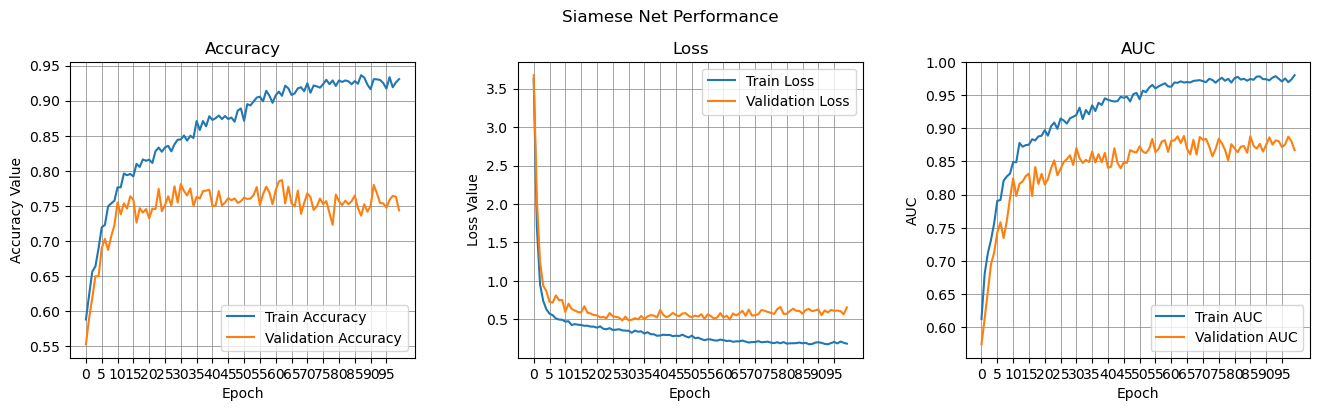

In [83]:
plot_history(resnet_log)